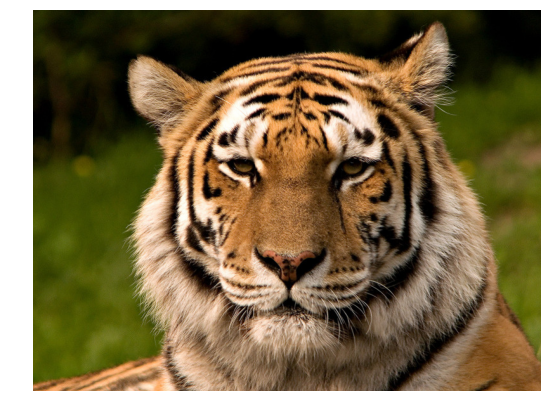

In [16]:
import matplotlib.image as imr
from skimage.io import imread, imsave, imshow
im = imr.imread('tiger-color.png')

import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,7)
plt.rc('axes',facecolor=(1,1,1,0),edgecolor=(1,1,1,0));
plt.rc(('xtick','ytick'),color=(1,1,1,0)); 
plt.rcParams["image.cmap"] = "gray" 
plt.imshow(im)
plt.show()

In [17]:
import numpy as np
kernel_blur = np.array([[1.,1.,1.],
[1.,1.,1.],
[1.,1.,1.]])/9.


kernel_sharpen1	= np.array([[-1.,-1.,-1.],
[-1.,17.,-1.],
[-1.,-1.,-1.]])/9.


kernel_sharpen2 = np.array([[0.,-1.,0.],
[-1.,5.,-1.],
[0.,-1.,0.]])


kernel_edge_detect1 = np.array([[-1.,-1.,-1.],
[-1.,8.,-1.],
[-1.,-1.,-1.]])


kernel_edge_detect2 = np.array([[0.,-1.,0.],
[-1.,4.,-1.],
[0.,-1.,0.]])

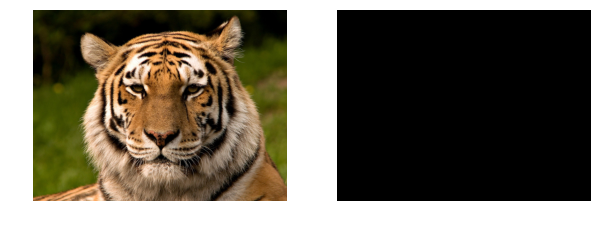

In [18]:
def proc(image, kernel,const=0): 
    kernel_sum = kernel.sum() 
    image = image/255.
    const = const/255.
    i_height, i_width = image.shape[0], image.shape[1] 
    k_width, k_height = kernel.shape[0], kernel.shape[1]
    filtered = np.zeros_like(image)
    for y in range(i_height):
        for x in range(i_width): 
            weighted_pixel_sum = 0
            for ky in range(-k_height // 2+1, k_height // 2+1):
                for kx in range(-k_width // 2+1, k_width // 2+1):
                    pixel = 0 
                    pixel_y = y - ky 
                    pixel_x = x - kx
                    if (pixel_y >= 0) and (pixel_y < i_height) and (pixel_x >= 0) and (pixel_x < i_width):
                        pixel = image[pixel_y,pixel_x] 
                    pos = (ky + k_height // 2, kx + k_width // 2) 
                    weight = kernel[pos[1], pos[0]] 
                    weighted_pixel_sum += pixel * weight
            weighted_pixel_sum+=const
            if all(weighted_pixel_sum > 1.): 
                weighted_pixel_sum=1.
            elif all(weighted_pixel_sum < 0.): 
                weighted_pixel_sum=0.
            filtered[y, x] = weighted_pixel_sum
    return (filtered*255).astype('int') 
plt.subplot(1,2,1)
plt.imshow(im)  
plt.subplot(1,2,2) 
plt.imshow(proc(im, kernel_blur)) 
plt.show()

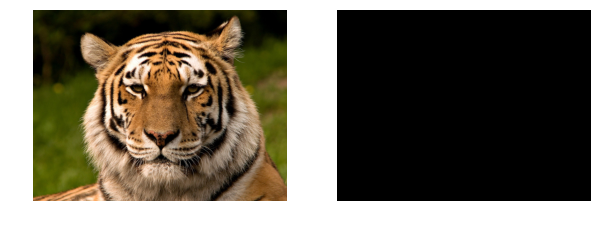

In [19]:
im_out=proc(im, kernel_sharpen1) 
plt.subplot(1,2,1) 
plt.imshow(im) 
plt.subplot(1,2,2) 
plt.imshow(im_out)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


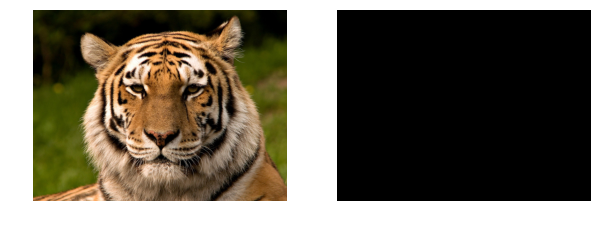

In [20]:
im_out=proc(im, kernel_edge_detect1) 
plt.subplot(1,2,1)
plt.imshow(im) 
plt.subplot(1,2,2) 
plt.imshow(im_out) 
plt.show()

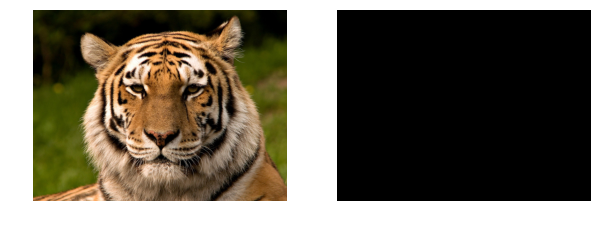

In [21]:
im_out=proc(im, kernel_edge_detect2) 
plt.subplot(1,2,1)
plt.imshow(im) 
plt.subplot(1,2,2) 
plt.imshow(im_out) 
plt.show()

# SRS3 - 3

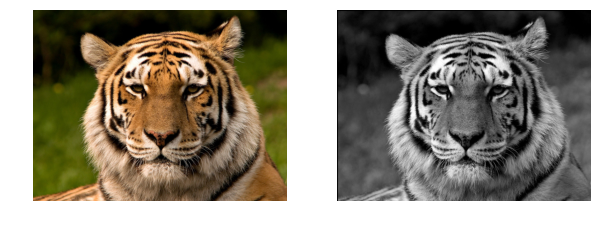

In [22]:
def median(image, size=(5,5)):
    i_height, i_width = image.shape[0], image.shape[1] 
    k_width, k_height = size[0], size[1]

    filtered = np.zeros_like(image)

    for y in range(i_height):
        for x in range(i_width): 
            weighted_pixel = []

            for ky in range(-k_height // 2, k_height - 1): 
                for kx in range(-k_width // 2, k_width - 1):
                    pixel = 0 
                    pixel_y = y - ky 
                    pixel_x = x - kx
 
                    if (pixel_y >= 0) and (pixel_y < i_height) and (pixel_x >= 0) and (pixel_x < i_width):
                        pixel = image[pixel_y,pixel_x] 
            weighted_pixel.append(pixel)
            filtered[y, x] = np.median(weighted_pixel)
    return filtered 
plt.subplot(1,2,1) 
plt.imshow(im) 
plt.subplot(1,2,2) 
plt.imshow(median(im)) 
plt.show()

# SRS3 - 4